## Developed by: Saad Aldin Mohamed
## email: sa3danny@yahoo.com

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

# Ignore useless warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

# ------------------------------------- Data preparation -------------------------------------------

In [2]:
activation_data = pd.read_excel('Activation_status_data.xlsx')
activation_data.head(3)

,name,activated,N2_BET,N2_Langmiur,last solvent,method
0,ACAJIZ_clean,yes,0.0,0.0,chloroform,exchange
1,ACAJOF_clean,yes,0.0,0.0,chloroform,exchange
2,ACUFEK_clean,yes,NaN,3800.0,dichloromethane,exchange


In [3]:
activation_data['activated'].unique()

array(['yes', nan, 'no', 'dup-remove', 'hypo-remove'], dtype=object)

In [4]:
## Remove duplicate and hypothetical enteries
dup_remove = activation_data[activation_data['activated']=='dup-remove'].index
hypo_remove = activation_data[activation_data['activated']=='hypo-remove'].index
activation_data = activation_data.drop(dup_remove)
activation_data = activation_data.drop(hypo_remove)

print ('Removed duplicate enteries = ', len(dup_remove))
print ('Removed hypothetical enteries = ', len(hypo_remove))
print ('size of the remaining data = ', len(activation_data))

Removed duplicate enteries =  49
Removed hypothetical enteries =  6
size of the remaining data =  280


# ------------------------------------    Activation status   ------------------------------------

In [5]:

activated_MOFs = activation_data[activation_data['activated']=='yes']
collapsed_MOFs = activation_data[activation_data['activated']=='no']
MOFs_with_no_information_on_activation = np.where(activation_data['activated'].isnull())[0]

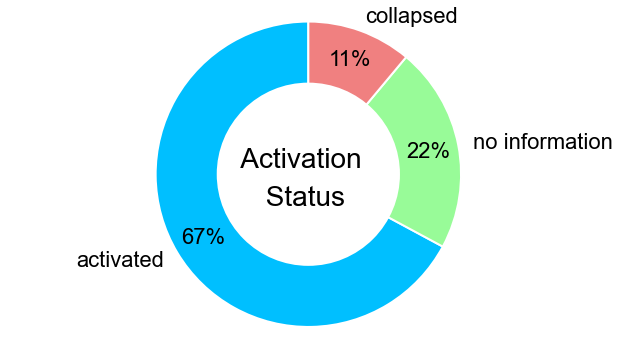

In [6]:
#Plot nice pie chart

activated = len(activated_MOFs)
collpased = len(collapsed_MOFs)
no_info = len(MOFs_with_no_information_on_activation)



labels = 'activated',  'no information', 'collapsed'
portions = [activated, no_info, collpased]

#--------------------------- Plot ----------------------------#

nice_colors = ( "deepskyblue",  "palegreen", "lightcoral")

explode = (0, 0, 0)

fig1, ax = plt.subplots(figsize=(9,5))
ax.pie(portions, explode=explode, pctdistance=0.8, colors = nice_colors, 
       textprops = dict(color ="k", fontname  ="Arial", fontsize = 22),  autopct='%1.0f%%',
	startangle=90, wedgeprops={"edgecolor":"w",'linewidth': 2, 'antialiased': True}, labels=labels)

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.text(-0.49, 0.05, ' Activation', dict(fontname  ="Arial", size=28, color ="k"))
plt.text(-0.33, -0.20, ' Status', dict(fontname  ="Arial", size=28, color ="k"))
plt.tight_layout()
fig.savefig("Activation status.png", dpi=200, transparent=True)


# ---------------------------------   Activation methods ------------------------------------

In [7]:
activated_MOFs.groupby('method')['name'].count()

method
exchange         131
freeze             5
many               1
supercritical     17
synthesis         31
Name: name, dtype: int64

In [8]:
collapsed_MOFs.groupby('method')['name'].count()

method
exchange         11
freeze            4
many              1
supercritical     8
synthesis         6
Name: name, dtype: int64

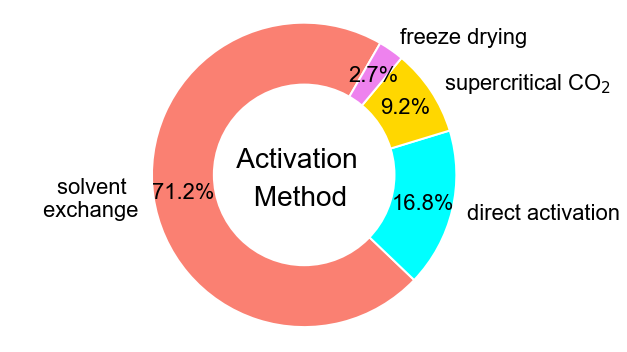

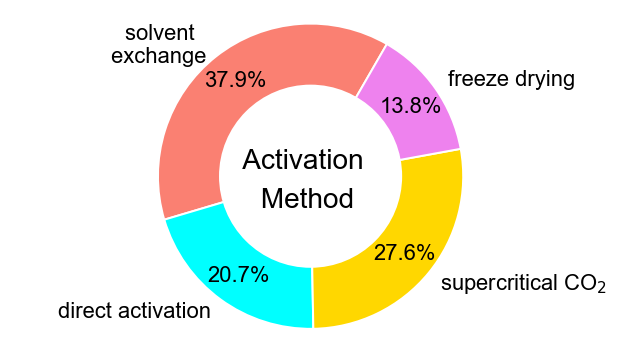

In [9]:
#Plot nice pie charts for the actiation methods

all_status = [activated_MOFs, collapsed_MOFs]
#-------------------------------------------------------#
for status in all_status:
    exchange = len(status[status['method']=='exchange'])
    direct = len(status[status['method']=='synthesis'])
    supercritic = len(status[status['method']=='supercritical'])
    freeze = len(status[status['method']=='freeze'])
    
    labels = 'solvent  \n exchange', 'direct activation', 'supercritical CO${_2}$', 'freeze drying' 
    portions = [ exchange, direct, supercritic, freeze]
    

    #--------------------------- Plot ----------------------------#
    
    nice_colors = ( "salmon", "cyan", "gold",  "violet")
    
    explode = (0, 0, 0, 0)
    
    fig, ax = plt.subplots(figsize=(9,5))
    ax.pie(portions, explode=explode, pctdistance=0.8, colors = nice_colors, 
           textprops = dict(color ="k", fontname  ="Arial", fontsize = 22),  autopct='%1.1f%%',
        startangle=60, wedgeprops={"edgecolor":"w",'linewidth': 2, 'antialiased': True}, labels=labels)
    
    #draw circle
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.text(-0.49, 0.05, ' Activation', dict(fontname  ="Arial", size=28, color ="k"))
    plt.text(-0.38, -0.20, ' Method', dict(fontname  ="Arial", size=28, color ="k"))
    plt.tight_layout()
    
    name =[x for x in globals() if globals()[x] is status][0]

    fig.savefig("Activation method_"+name+".png", dpi=200, transparent=True)

# ---------------------------------   Exchange solvent ------------------------------------

In [10]:
activated_exchange = activated_MOFs[activated_MOFs['method']=='exchange']
activated_exchange .groupby('last solvent')['name'].count()

last solvent
acetone                               44
acetonitrile                           2
chloroform                             7
dichloromethane                       34
ethanol                                9
methanol                              32
mixture (dichloromethane/methanol)     1
mixture (methanol/dichloromethane)     1
tetrahydrofuran                        1
Name: name, dtype: int64

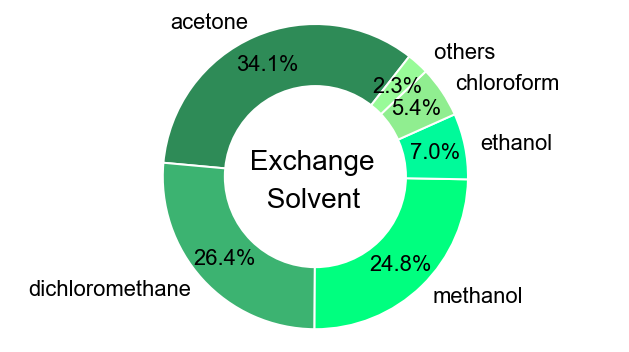

In [11]:
#Plot nice pie chart for the last used solvent during solvent-exchange --> Activated MOFs
#The cases where MOFs activated from a mixture or many solvent were excluded

acetone = len(activated_exchange[activated_exchange['last solvent']=='acetone'])
dichloromethane = len(activated_exchange[activated_exchange['last solvent']=='dichloromethane'])
methanol = len(activated_exchange[activated_exchange['last solvent']=='methanol'])
ethanol= len(activated_exchange[activated_exchange['last solvent']=='ethanol'])
chloroform = len(activated_exchange[activated_exchange['last solvent']=='chloroform'])
others = len(activated_exchange[(activated_exchange['last solvent']=='acetonitrile')|
                                (activated_exchange['last solvent']=='tetrahydrofuran')])

labels = 'acetone', 'dichloromethane', 'methanol',   'ethanol' ,  'chloroform',' others'
portions = [ acetone, dichloromethane, methanol,  ethanol, chloroform, others]
#--------------------------- Plot ----------------------------#

nice_colors = ( "seagreen", "mediumseagreen",  "springgreen", "mediumspringgreen",  'lightgreen', 'palegreen')

explode = (0, 0, 0, 0, 0, 0)

fig1, ax = plt.subplots(figsize=(9,5))
ax.pie(portions, explode=explode, pctdistance=0.8, colors = nice_colors, 
       textprops = dict(color ="k", fontname  ="Arial", fontsize = 22),  autopct='%1.1f%%',
	startangle=52, wedgeprops={"edgecolor":"w",'linewidth': 2, 'antialiased': True}, labels=labels)

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.text(-0.48, 0.05, ' Exchange', dict(fontname  ="Arial", size=28, color ="k"))
plt.text(-0.37, -0.20, ' Solvent', dict(fontname  ="Arial", size=28, color ="k"))
plt.tight_layout()
fig.savefig("Exchange solvents_activated.png", dpi=200, transparent=True)

In [12]:
collapsed_exchange = collapsed_MOFs[collapsed_MOFs['method']=='exchange']
collapsed_exchange .groupby('last solvent')['name'].count()

last solvent
acetone            2
dichloromethane    4
many               5
Name: name, dtype: int64

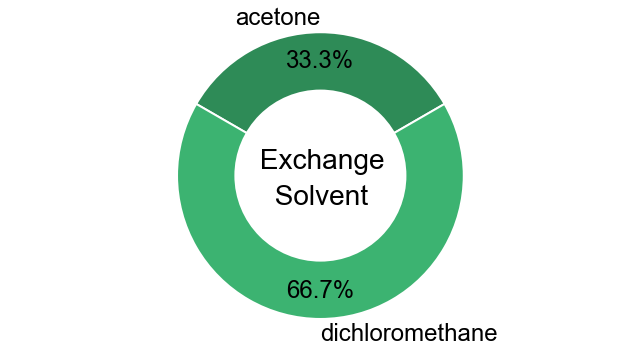

In [13]:
#Plot nice pie chart for the last used solvent during solvent-exchange --> Collapsed MOFs
#The cases where the activation attempted from a mixture or many solvent were excluded

acetone = len(collapsed_exchange[collapsed_exchange['last solvent']=='acetone'])
dichloromethane = len(collapsed_exchange[collapsed_exchange['last solvent']=='dichloromethane'])

labels = 'acetone', 'dichloromethane' 
portions = [  acetone, dichloromethane ]
#--------------------------- Plot ----------------------------#

nice_colors = ( "seagreen", "mediumseagreen",  "springgreen", "mediumspringgreen",  'lightgreen', 'palegreen')

explode = (0, 0)

fig1, ax = plt.subplots(figsize=(9,5))
ax.pie(portions, explode=explode, pctdistance=0.8, colors = nice_colors, 
       textprops = dict(color ="k", fontname  ="Arial", fontsize = 24),  autopct='%1.1f%%',
	startangle=30, wedgeprops={"edgecolor":"w",'linewidth': 2, 'antialiased': True}, labels=labels)

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.text(-0.48, 0.05, ' Exchange', dict(fontname  ="Arial", size=28, color ="k"))
plt.text(-0.37, -0.20, ' Solvent', dict(fontname  ="Arial", size=28, color ="k"))
plt.tight_layout()

fig.savefig("Exchange solvents_collapsed.png", dpi=200, transparent=True)